DISCLAIMER 

hello there and welcome to my notebook. 
I took the second task because i'm confident with CNN's .
In this notebook i went and developed multiple models trying everytime to find better accuracies , it's a try on error process .By the end i used to efficientnet b0 pre-trained model because i found it was the optimal solution and got me 88% accuracy.I have used comments so your read of the notebook will be more clear . 
Best regards. 

In [2]:
# extracting data from the drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# compressing the data zip file
import zipfile

file_zip = "/content/drive/MyDrive/archive.zip"

zip_ref = zipfile.ZipFile(file_zip, "r")
zip_ref.extractall()
zip_ref.close()


In [15]:
# exploring my folders and files 

import os
x = 0 
for dirpath, dirnames, filenames in os.walk("/content/BarkVN-50/BarkVN-50_mendeley"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  x+= len(filenames)
print("total : " , x )


There are 50 directories and 0 images in '/content/BarkVN-50/BarkVN-50_mendeley'.
There are 0 directories and 97 images in '/content/BarkVN-50/BarkVN-50_mendeley/Wrightia'.
There are 0 directories and 84 images in '/content/BarkVN-50/BarkVN-50_mendeley/Citrus grandis'.
There are 0 directories and 91 images in '/content/BarkVN-50/BarkVN-50_mendeley/Hopea'.
There are 0 directories and 105 images in '/content/BarkVN-50/BarkVN-50_mendeley/Prunus salicina'.
There are 0 directories and 111 images in '/content/BarkVN-50/BarkVN-50_mendeley/Chrysophyllum cainino'.
There are 0 directories and 93 images in '/content/BarkVN-50/BarkVN-50_mendeley/Senna siamea'.
There are 0 directories and 100 images in '/content/BarkVN-50/BarkVN-50_mendeley/Wrightia religiosa'.
There are 0 directories and 138 images in '/content/BarkVN-50/BarkVN-50_mendeley/Artocarpus heterophyllus'.
There are 0 directories and 103 images in '/content/BarkVN-50/BarkVN-50_mendeley/Persea'.
There are 0 directories and 95 images in '/

In [16]:
# View an image function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class
  print(target_folder)
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



/content/BarkVN-50/BarkVN-50_mendeley/Acacia
Image shape: (404, 303, 3)


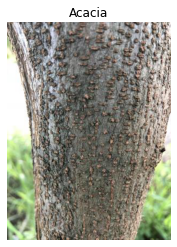

In [6]:
# View a random image from the dataset
img = view_random_image(target_dir="/content/BarkVN-50/BarkVN-50_mendeley/",
                        target_class="Acacia"  )

In [7]:
# shape of the image again
img.shape

(404, 303, 3)

In [8]:
# view the tensor of the image 

img

array([[[170, 160, 158],
        [133, 124, 119],
        [131, 120, 114],
        ...,
        [186, 179, 173],
        [255, 253, 248],
        [255, 250, 248]],

       [[112, 102, 100],
        [136, 127, 122],
        [131, 120, 114],
        ...,
        [191, 184, 178],
        [255, 249, 246],
        [255, 250, 248]],

       [[ 85,  77,  74],
        [114, 104, 102],
        [113, 104,  97],
        ...,
        [204, 199, 195],
        [247, 239, 236],
        [255, 252, 251]],

       ...,

       [[ 60,  65,  58],
        [ 69,  77,  64],
        [ 84,  97,  79],
        ...,
        [125, 156, 112],
        [121, 154, 109],
        [115, 152, 108]],

       [[ 70,  75,  68],
        [ 78,  86,  73],
        [ 91, 104,  86],
        ...,
        [117, 148, 104],
        [115, 148, 103],
        [111, 148, 104]],

       [[ 75,  80,  73],
        [ 82,  90,  77],
        [ 94, 107,  89],
        ...,
        [110, 141,  97],
        [112, 145, 100],
        [109, 146, 102]]

In [18]:
# data preprocessing 

from tensorflow._api.v2.random import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/BarkVN-50/BarkVN-50_mendeley"
# Set the seed
tf.random.set_seed(42)

# get all of the pixel values between 1 and 0 and do some flipping and zooming etc etc ....
datagen = ImageDataGenerator( rescale=1./255 , 
                                    rotation_range = 20 , 
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True , 
            
                                    validation_split=0.2
                                    )
test_datagen = ImageDataGenerator( rescale=1./255 , 
                                    
                                    validation_split=0.2
                                    )


# splitting it to test and train with a ratio of 0.2 and 0.8
train_data= datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical' , 
                                              subset = 'training'
                                              )

test_data= test_datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical' , 
                                              subset = 'validation'
                                              )





Found 4483 images belonging to 50 classes.
Found 1095 images belonging to 50 classes.


In [27]:

train_data.class_indices


{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [11]:
# function to plot my loss and accuracy curves for validation and training

def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Epoch 1/20
141/141 [==============================] - 61s 419ms/step - loss: 3.7777 - accuracy: 0.0526 - val_loss: 3.7914 - val_accuracy: 0.0877
Epoch 2/20
141/141 [==============================] - 59s 418ms/step - loss: 3.1937 - accuracy: 0.1544 - val_loss: 3.2827 - val_accuracy: 0.1936
Epoch 3/20
141/141 [==============================] - 58s 411ms/step - loss: 2.7326 - accuracy: 0.2556 - val_loss: 2.7132 - val_accuracy: 0.2950
Epoch 4/20
141/141 [==============================] - 55s 393ms/step - loss: 2.3449 - accuracy: 0.3547 - val_loss: 2.3496 - val_accuracy: 0.3945
Epoch 5/20
141/141 [==============================] - 56s 400ms/step - loss: 2.0482 - accuracy: 0.4283 - val_loss: 2.6779 - val_accuracy: 0.3461
Epoch 6/20
141/141 [==============================] - 56s 400ms/step - loss: 1.8791 - accuracy: 0.4776 - val_loss: 3.2204 - val_accuracy: 0.3324
Epoch 7/20
141/141 [==============================] - 55s 391ms/step - loss: 1.7142 - accuracy: 0.5171 - val_loss: 3.5625 - val_ac

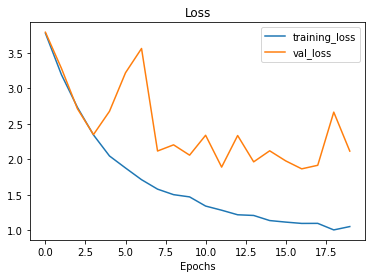

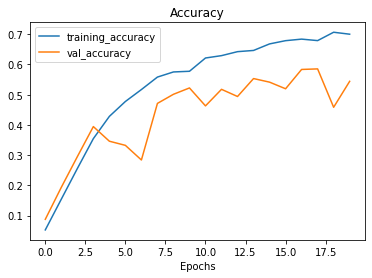

In [28]:
# for my first model i tried to use a simple CNN model


model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D( filters = 10 ,
                                                      kernel_size = 3 , 
                                                      input_shape=(224,224 , 3) , 
                                                      activation='relu') , 
                              # adding conv2d layers and pooling layers 
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(50 , activation='Softmax') 
                              # 50 for the output because we have 50 classes
])
# adam optimizer 
model.compile(
                loss = tf.keras.losses.CategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ["accuracy"]
)
# fit the model
history=model.fit(
            train_data , 
            epochs = 20 , 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)   
)

plot_loss_curves(history)

In [31]:
# model 1 was overfitting ... let's try to reduce some layers

Epoch 1/5
141/141 [==============================] - 57s 404ms/step - loss: 3.6106 - accuracy: 0.0886 - val_loss: 4.0153 - val_accuracy: 0.0804
Epoch 2/5
141/141 [==============================] - 62s 443ms/step - loss: 3.1359 - accuracy: 0.1704 - val_loss: 3.7550 - val_accuracy: 0.1370
Epoch 3/5
141/141 [==============================] - 63s 447ms/step - loss: 2.8592 - accuracy: 0.2400 - val_loss: 3.2017 - val_accuracy: 0.2256
Epoch 4/5
141/141 [==============================] - 64s 454ms/step - loss: 2.5670 - accuracy: 0.3212 - val_loss: 2.8844 - val_accuracy: 0.2530
Epoch 5/5
141/141 [==============================] - 63s 446ms/step - loss: 2.1362 - accuracy: 0.4156 - val_loss: 3.1115 - val_accuracy: 0.2941


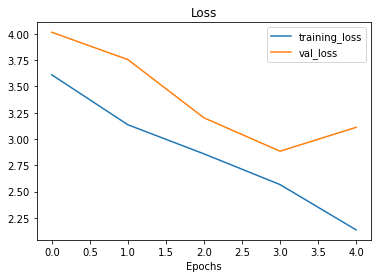

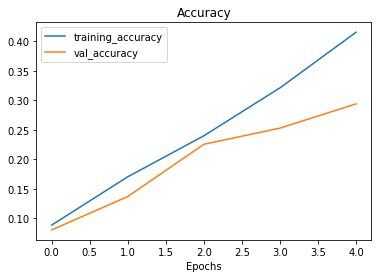

In [36]:

tf.random.set_seed(42)
model2 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D( filters = 10 ,
                                                      kernel_size = 3 , 
                                                      input_shape=(224,224 , 3) , 
                                                      activation='relu') , 

                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(50 , activation='Softmax') 
])

model2.compile(
                loss = tf.keras.losses.CategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ["accuracy"]
)

history2=model2.fit(
            train_data , 
            epochs = 5 , 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)   
)

plot_loss_curves(history2)

In [ ]:
# still no impressive results ... lets try to find the best learning rate 

Epoch 1/20
141/141 [==============================] - 66s 467ms/step - loss: 3.8266 - accuracy: 0.0455 - val_loss: 3.6537 - val_accuracy: 0.1005 - lr: 1.0000e-04
Epoch 2/20
141/141 [==============================] - 66s 465ms/step - loss: 3.4246 - accuracy: 0.1452 - val_loss: 3.2481 - val_accuracy: 0.1753 - lr: 1.3493e-04
Epoch 3/20
141/141 [==============================] - 66s 467ms/step - loss: 3.0628 - accuracy: 0.2070 - val_loss: 3.0067 - val_accuracy: 0.2164 - lr: 1.8206e-04
Epoch 4/20
141/141 [==============================] - 65s 460ms/step - loss: 2.7435 - accuracy: 0.2728 - val_loss: 2.8320 - val_accuracy: 0.2274 - lr: 2.4565e-04
Epoch 5/20
141/141 [==============================] - 65s 462ms/step - loss: 2.4803 - accuracy: 0.3458 - val_loss: 2.6862 - val_accuracy: 0.2822 - lr: 3.3145e-04
Epoch 6/20
141/141 [==============================] - 65s 463ms/step - loss: 2.3114 - accuracy: 0.3739 - val_loss: 2.6088 - val_accuracy: 0.3142 - lr: 4.4721e-04
Epoch 7/20
141/141 [========

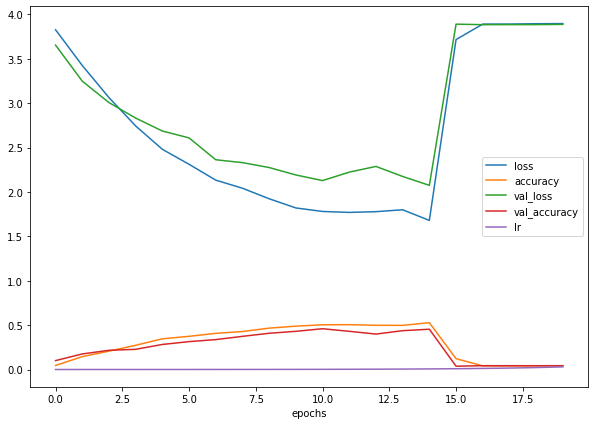

In [ ]:
import pandas as pd
model3 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D( filters = 10 ,
                                                      kernel_size = 3 , 
                                                      input_shape=(224,224 , 3) , 
                                                      activation='relu') , 

                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D() ,
                              tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(50 , activation='Softmax') 
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 20**(epoch/10))


model3.compile(
                loss = tf.keras.losses.CategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ["accuracy"]
)

history3=model3.fit(
            train_data , 
            epochs = 20 , 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)  , callbacks=[lr_scheduler] 
)

pd.DataFrame(history3.history).plot(figsize=(10,7), xlabel="epochs")

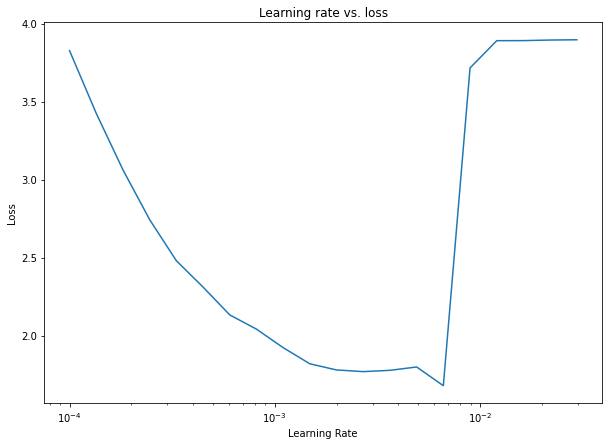

In [ ]:
# plotting the learning rate and loss curve
import numpy as np 
lrs = 1e-4 * (20 ** (np.arange(20)/10))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history3.history["loss"]) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [37]:
# approximatly the best learning rate is 0.0055

In [ ]:
# lets try transfer learning 

In [ ]:
# i'm gonna try the resnet50 model 

import tensorflow_hub as hub
from tensorflow.keras import layers 

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224,224 , 3) ) # define the input image shape
  
model4 = tf.keras.Sequential([
  feature_extractor_layer, # use the feature extraction layer as the base
  layers.Dense(50, activation='softmax', name='output_layer') # output layer     
])

model4.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0055),
                     metrics=['accuracy'])

history4 = model4.fit(   train_data , 
            epochs = 5 , 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)
                            ) 


Epoch 1/5
141/141 [==============================] - 74s 502ms/step - loss: 1.7635 - accuracy: 0.5967 - val_loss: 1.5865 - val_accuracy: 0.6201
Epoch 2/5
141/141 [==============================] - 69s 492ms/step - loss: 0.8059 - accuracy: 0.7798 - val_loss: 1.3076 - val_accuracy: 0.7068
Epoch 3/5
141/141 [==============================] - 70s 494ms/step - loss: 0.6289 - accuracy: 0.8249 - val_loss: 1.2894 - val_accuracy: 0.7269
Epoch 4/5
141/141 [==============================] - 69s 490ms/step - loss: 0.5750 - accuracy: 0.8414 - val_loss: 1.3623 - val_accuracy: 0.7297
Epoch 5/5
141/141 [==============================] - 70s 493ms/step - loss: 0.4959 - accuracy: 0.8653 - val_loss: 1.3255 - val_accuracy: 0.7388


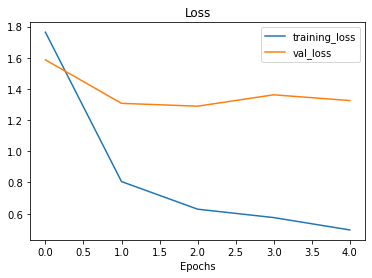

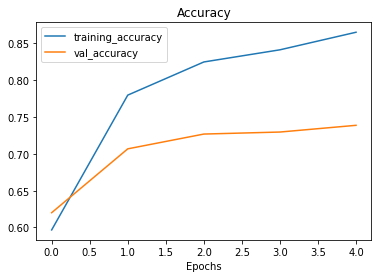

In [ ]:
plot_loss_curves(history4)

In [ ]:
# i'm not gonna try for more epochs .... its pointless seeing from the chart the validation accuracy is going down but 74% was not bad 

In [22]:
# i'm gonna use efficientnetB0 this time

import tensorflow_hub as hub
from tensorflow.keras import layers 
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224,224 , 3) ) # define the input image shape
  

model5 = tf.keras.Sequential([
  feature_extractor_layer, 
  layers.Dense(50, activation='softmax', name='output_layer') #  output layer      
])

model5.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

history5 = model5.fit(   train_data , 
            epochs = 20 , 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)
                            ) 



Epoch 1/20
141/141 [==============================] - 68s 427ms/step - loss: 2.2254 - accuracy: 0.5378 - val_loss: 1.5439 - val_accuracy: 0.6420
Epoch 2/20
141/141 [==============================] - 58s 411ms/step - loss: 0.9965 - accuracy: 0.8242 - val_loss: 1.1118 - val_accuracy: 0.7324
Epoch 3/20
141/141 [==============================] - 58s 413ms/step - loss: 0.6980 - accuracy: 0.8749 - val_loss: 0.8925 - val_accuracy: 0.7854
Epoch 4/20
141/141 [==============================] - 59s 419ms/step - loss: 0.5481 - accuracy: 0.8961 - val_loss: 0.7948 - val_accuracy: 0.8064
Epoch 5/20
141/141 [==============================] - 57s 404ms/step - loss: 0.4393 - accuracy: 0.9161 - val_loss: 0.6859 - val_accuracy: 0.8384
Epoch 6/20
141/141 [==============================] - 57s 405ms/step - loss: 0.3822 - accuracy: 0.9242 - val_loss: 0.6280 - val_accuracy: 0.8374
Epoch 7/20
141/141 [==============================] - 58s 413ms/step - loss: 0.3380 - accuracy: 0.9375 - val_loss: 0.5874 - val_ac

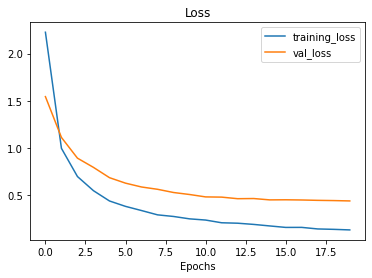

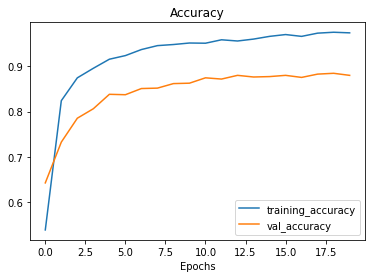

In [24]:
plot_loss_curves(history5)

In [ ]:
# overfitting but i still came out with 88% accuracy

In [23]:

# trying out VGG16 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16


vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in vgg16.layers:
  layer.trainable = False
x = Flatten()(vgg16.output)
prediction = Dense(50, activation='softmax')(x)
model6 = Model(inputs=vgg16.input, outputs=prediction)
model6.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

history6 = model6.fit_generator(
  train_data,
  validation_data=test_data ,
  epochs=20,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data)
)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
141/141 [==============================] - 64s 452ms/step - loss: 2.1642 - accuracy: 0.4849 - val_loss: 1.3219 - val_accuracy: 0.6420
Epoch 2/20
141/141 [==============================] - 65s 459ms/step - loss: 1.0629 - accuracy: 0.7009 - val_loss: 1.2392 - val_accuracy: 0.6849
Epoch 3/20
141/141 [==============================] - 64s 452ms/step - loss: 0.8997 - accuracy: 0.7493 - val_loss: 1.3019 - val_accuracy: 0.7434
Epoch 4/20
141/141 [==============================] - 63s 448ms/step - loss: 0.7984 - accuracy: 0.7723 - val_loss: 1.3133 - val_accuracy: 0.7014
Epoch 5/20
141/141 [==============================] - 63s 448ms/step - loss: 0.7695 - accuracy: 0.7825 - val_loss: 1.2032 - val_accuracy: 0.7333
Epoch 6/20
141/141 [==============================] - 64s 451ms/step - loss: 0.6807 - accuracy: 0.8115 - val_loss: 1.1479 - val_accuracy: 0.7489
Epoch 7/20
141/141 [==============================] - 65s 462ms/step - loss: 0.6372 - accuracy: 0.8213 - val_loss: 1.1639 - val_ac

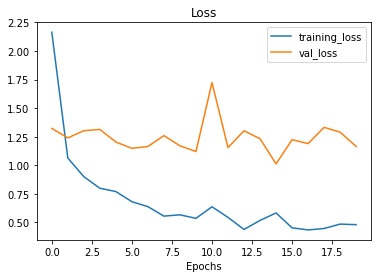

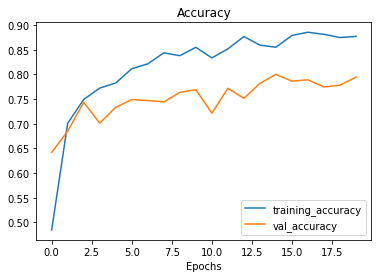

In [26]:
# still a problem with overfitting ....

plot_loss_curves(history6)

In [39]:
# the best model so far was model5 so lets create a confusion matrix for it 

In [41]:
class_names = list(train_data.class_indices.keys())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


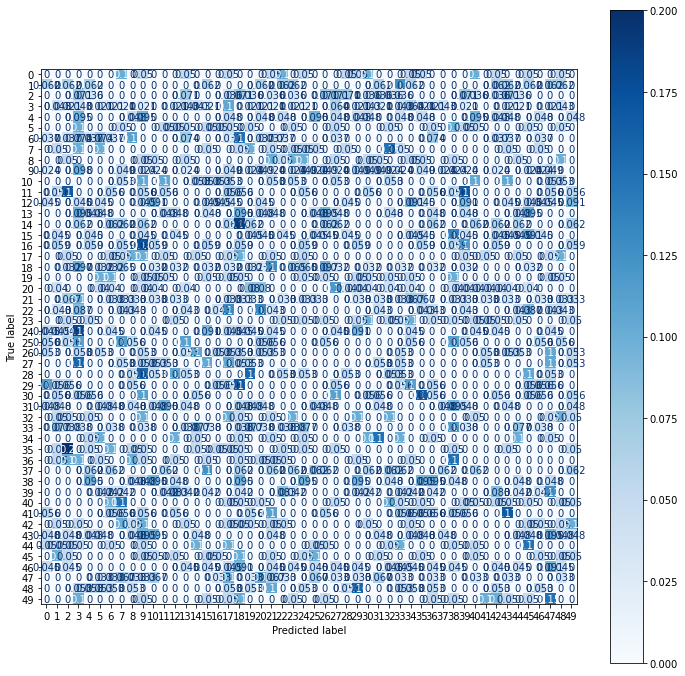

In [44]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model5, class_names)

figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=test_data, y_true=test_data.classes ,
                      cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])